# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Your code here! :)
data = pd.read_csv("./GermanCredit.csv")
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
data.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [5]:
def convert_class(value):    
    if(value == "Good"):
        return 1
    else:
        return 0

In [6]:
data["Class"] = data["Class"].map(convert_class)

In [7]:
len(data.columns)

62

In [8]:
data["Class"].value_counts()

1    700
0    300
Name: Class, dtype: int64

In [9]:
X = data.loc[:, data.columns != "Class"]

In [10]:
"Class" in X.columns

False

In [11]:
y = data.loc[:, ["Class"]]

In [12]:
y.columns

Index(['Class'], dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
dt = DecisionTreeClassifier()

In [15]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = dt.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51        86
           1       0.80      0.79      0.79       214

    accuracy                           0.71       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.72      0.71      0.71       300



In [18]:
print(classification_report(y_test, y_pred, target_names=["Bad", "Good"]))

              precision    recall  f1-score   support

         Bad       0.49      0.52      0.51        86
        Good       0.80      0.79      0.79       214

    accuracy                           0.71       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.72      0.71      0.71       300



In [19]:
dt = DecisionTreeClassifier()
params = { 'criterion':['gini','entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150] }
gs = GridSearchCV(estimator=dt,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [20]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [21]:
gs.best_index_

0

In [22]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [23]:
gs.best_score_

0.7157142857142856

In [24]:
gs.cv_results_

{'mean_fit_time': array([0.0227572 , 0.02265038, 0.02209859, 0.02320595, 0.02415295,
        0.02510767, 0.02561369, 0.02652593, 0.02708654, 0.02701001,
        0.02931113, 0.02832499, 0.0284287 , 0.02660608, 0.0267529 ,
        0.02691002, 0.02742705, 0.02853036, 0.02091856, 0.02231216,
        0.02244902, 0.0233017 , 0.02469225, 0.02564139, 0.02617497,
        0.02603526, 0.02681785, 0.02799377, 0.02780805, 0.02753921,
        0.02763882, 0.02764864, 0.02772012, 0.02756863, 0.03171053,
        0.0307857 ]),
 'std_fit_time': array([0.00182466, 0.00157364, 0.00018834, 0.0002637 , 0.0002447 ,
        0.0002793 , 0.00015789, 0.00072165, 0.00016847, 0.00049726,
        0.00175073, 0.00152553, 0.00159516, 0.00029909, 0.00023939,
        0.00023295, 0.00040022, 0.00359011, 0.00062201, 0.00083175,
        0.00033727, 0.00023031, 0.00028853, 0.00047723, 0.00040119,
        0.00026048, 0.00031913, 0.0006854 , 0.00036284, 0.00016602,
        0.00046081, 0.0003723 , 0.0003355 , 0.00010498, 0.006

In [25]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [26]:
import os

In [27]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [28]:
! pip install pydot

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [29]:
! pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [30]:
# Your code here! :)
from dtreeviz.trees import dtreeviz

In [31]:
viz = dtreeviz(dt, x_data=X_train, y_data=y_train.values.flatten(), target_name='Class', feature_names=data.columns)
viz.save("boston.svg") # suffix determines the generated image format
viz.view()     

In [32]:
X_train.values

array([[   24, 11938,     2, ...,     0,     0,     1],
       [   36,  1819,     4, ...,     0,     1,     0],
       [   15,  1478,     4, ...,     0,     1,     0],
       ...,
       [    9,  3832,     1, ...,     1,     0,     0],
       [   18,  1928,     2, ...,     1,     0,     0],
       [   36,  9857,     1, ...,     1,     0,     0]])

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Your code here! :)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56        86
           1       0.81      0.91      0.86       214

    accuracy                           0.79       300
   macro avg       0.75      0.69      0.71       300
weighted avg       0.78      0.79      0.77       300



In [37]:
rfc = RandomForestClassifier()
params = { 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150] }
gs = GridSearchCV(rfc, param_grid=params)
gs.fit(X_train,y_train)

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:59

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:59

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:59

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:59

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:59

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [38]:
gs.best_estimator_

RandomForestClassifier(max_depth=15)

In [39]:
gs.best_index_

9

In [40]:
gs.best_score_

0.777142857142857

In [41]:
gs.best_params_

{'max_depth': 15}

In [42]:
gs.cv_results_

{'mean_fit_time': array([0.57744188, 0.55646868, 0.57109151, 0.57366543, 0.64165101,
        0.63969293, 0.62619328, 0.63911943, 0.69253812, 0.75242529,
        0.76983795, 0.70831227, 0.72471595, 0.70440464, 0.71373391,
        0.69256959, 0.65307469, 0.64219851]),
 'std_fit_time': array([0.04505901, 0.01176236, 0.01401072, 0.01505754, 0.06279424,
        0.04833456, 0.07809325, 0.01272901, 0.09510285, 0.04941691,
        0.04640026, 0.01623926, 0.02703477, 0.02228719, 0.04057065,
        0.06368734, 0.04152191, 0.03692419]),
 'mean_score_time': array([0.05831366, 0.05107565, 0.05181818, 0.0481812 , 0.05416079,
        0.05450764, 0.05144739, 0.05709348, 0.05977449, 0.05887394,
        0.06511569, 0.06283264, 0.05869827, 0.06127949, 0.0620173 ,
        0.06423111, 0.06363072, 0.05177221]),
 'std_score_time': array([0.00578297, 0.003685  , 0.00405475, 0.00082371, 0.00811691,
        0.00678582, 0.00201329, 0.01082574, 0.00984114, 0.00591524,
        0.01283954, 0.00578705, 0.00285133, 

In [43]:
rfc = RandomForestClassifier(max_depth=50)
rfc.fit(X_train,y_train)
rfc.feature_importances_

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.07819725, 0.10180931, 0.03465816, 0.03481431, 0.07412977,
       0.02020209, 0.01212606, 0.01721775, 0.00328725, 0.04713309,
       0.01746763, 0.00831017, 0.04536663, 0.01377858, 0.01397107,
       0.01376267, 0.01039313, 0.020836  , 0.0184431 , 0.01073253,
       0.01410195, 0.01162478, 0.00302493, 0.00623332, 0.00602986,
       0.        , 0.00126546, 0.01177834, 0.00224418, 0.01732244,
       0.00772133, 0.00624914, 0.00485716, 0.01026592, 0.01686095,
       0.01356229, 0.01246853, 0.01365446, 0.00580167, 0.00640469,
       0.01462111, 0.01673548, 0.00924822, 0.        , 0.01012736,
       0.00712615, 0.00778351, 0.01871981, 0.01234945, 0.01502652,
       0.01098523, 0.01222377, 0.00811114, 0.01541552, 0.01206047,
       0.01341664, 0.00700229, 0.00235272, 0.01217341, 0.01510163,
       0.01131164])

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [44]:
X_train.columns.values

array(['Duration', 'Amount', 'InstallmentRatePercentage',
       'ResidenceDuration', 'Age', 'NumberExistingCredits',
       'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker',
       'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
       'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none',
       'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid',
       'CreditHistory.PaidDuly', 'CreditHistory.Delay',
       'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar',
       'Purpose.Furniture.Equipment', 'Purpose.Radio.Television',
       'Purpose.DomesticAppliance', 'Purpose.Repairs',
       'Purpose.Education', 'Purpose.Vacation', 'Purpose.Retraining',
       'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100',
       'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4

In [45]:
# Your code here
len(X_train.columns)

61

In [46]:
len(rfc.feature_importances_)

61

In [47]:
type(X_train.columns.values)

numpy.ndarray

In [48]:
type(rfc.feature_importances_)

numpy.ndarray

In [49]:
import matplotlib.pyplot as plt

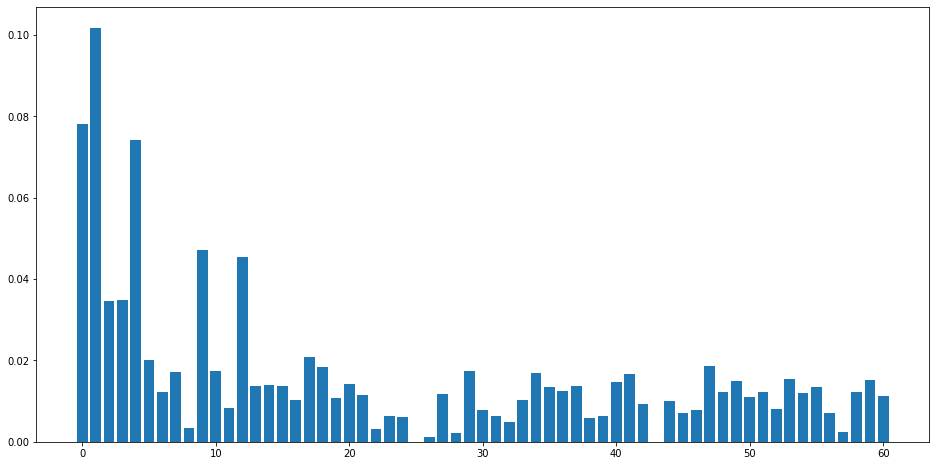

In [50]:
plt.figure(figsize=(16, 8))
plt.bar(range(0, len(X_train.columns.values)), rfc.feature_importances_, width=0.8)
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [51]:
! pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred = dt.predict(X_test)

In [54]:
dt.score(X_train, y_train)

1.0

In [55]:
dt.score(X_test,y_test)

0.6966666666666667

In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def plot_feature_important_plot(model, features):
    no_feature = len(features)
    plt.figure(figsize=(8,16))
    plt.barh(range(no_feature),model.feature_importances_, align="center")
    plt.yticks(np.arange(no_feature), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, no_feature)
    plt.show()

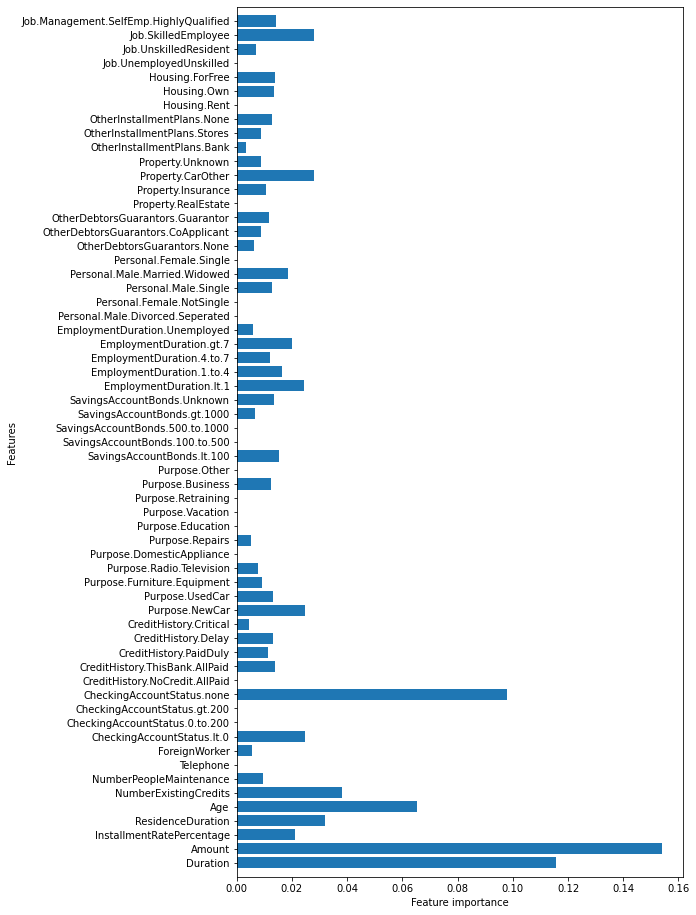

In [58]:
plot_feature_important_plot(dt, X_train.columns)

In [59]:
rfc = RandomForestClassifier(max_depth=50)
rfc.fit(X_train,y_train)

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=50)

In [60]:
rfc.score(X_train, y_train)

1.0

In [61]:
rfc.score(X_test, y_test)

0.7766666666666666

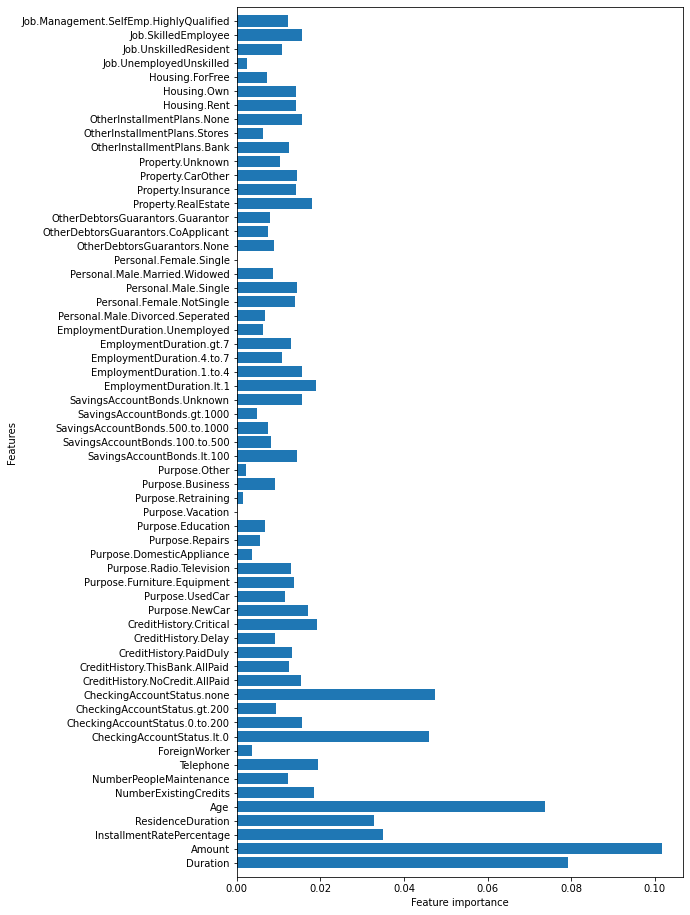

In [62]:
plot_feature_important_plot(rfc, X_train.columns)

In [63]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.inspection.partial_dependence import partial_dependence
from sklearn.inspection import plot_partial_dependence
# i dont know why i am facing this error

ModuleNotFoundError: No module named 'sklearn.inspection.partial_dependence'

In [ ]:
plot_partial_dependence(dt, X_train, features=[0,1,2,3,4,5,6,7,8], feature_names=X_train.columns[0:9], grid_resolution=100)

In [ ]:
rfc.feature_importances_[7]

In [ ]:
X_train.columns[7]

In [ ]:
# Your code here!
import pdb

In [ ]:
from joblib import dump, load

In [ ]:
filename = "model.sav"
dump(rfc, filename)

In [ ]:
rfc = load(filename)

In [ ]:
#import pdbbox
# not able to import the libray pdpbox

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

In [ ]:
! pip install xgboost 

In [ ]:
! pip install catboost

In [ ]:
! pip install lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [84]:
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report

In [80]:
xgbc = XGBRFClassifier()

In [82]:
xgbc.fit(X_train, y_train)

/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/mnt/BA504CE3504CA7C9/Work/Python/Workspace/SpringBoard/mec-mini-projects-ps/mec-13.5.1-tree-based-algorithms-mini-project/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:46:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=12, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [83]:
y_pred = xgbc.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.7633333333333333

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50        86
           1       0.79      0.90      0.84       214

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.75      0.76      0.75       300



In [88]:
from catboost import CatBoostClassifier

In [89]:
cbc = CatBoostClassifier()

In [90]:
cbc.fit(X_train, y_train)

Learning rate set to 0.008847
0:	learn: 0.6895901	total: 55ms	remaining: 55s
1:	learn: 0.6860987	total: 59.4ms	remaining: 29.6s
2:	learn: 0.6823382	total: 64ms	remaining: 21.3s
3:	learn: 0.6787532	total: 68.4ms	remaining: 17s
4:	learn: 0.6751461	total: 72.6ms	remaining: 14.5s
5:	learn: 0.6716843	total: 77ms	remaining: 12.8s
6:	learn: 0.6690411	total: 80.1ms	remaining: 11.4s
7:	learn: 0.6658853	total: 84.5ms	remaining: 10.5s
8:	learn: 0.6627168	total: 88.8ms	remaining: 9.78s
9:	learn: 0.6596452	total: 93.1ms	remaining: 9.21s
10:	learn: 0.6565003	total: 97.5ms	remaining: 8.76s
11:	learn: 0.6534109	total: 102ms	remaining: 8.39s
12:	learn: 0.6505024	total: 106ms	remaining: 8.08s
13:	learn: 0.6476811	total: 111ms	remaining: 7.81s
14:	learn: 0.6447818	total: 115ms	remaining: 7.57s
15:	learn: 0.6421719	total: 120ms	remaining: 7.36s
16:	learn: 0.6395256	total: 124ms	remaining: 7.16s
17:	learn: 0.6366630	total: 128ms	remaining: 6.99s
18:	learn: 0.6338762	total: 133ms	remaining: 6.85s
19:	learn:

167:	learn: 0.4531352	total: 822ms	remaining: 4.07s
168:	learn: 0.4524473	total: 827ms	remaining: 4.07s
169:	learn: 0.4517585	total: 832ms	remaining: 4.06s
170:	learn: 0.4512753	total: 836ms	remaining: 4.05s
171:	learn: 0.4508587	total: 841ms	remaining: 4.05s
172:	learn: 0.4503161	total: 845ms	remaining: 4.04s
173:	learn: 0.4498261	total: 850ms	remaining: 4.03s
174:	learn: 0.4491335	total: 854ms	remaining: 4.03s
175:	learn: 0.4485322	total: 859ms	remaining: 4.02s
176:	learn: 0.4479674	total: 863ms	remaining: 4.01s
177:	learn: 0.4473016	total: 868ms	remaining: 4.01s
178:	learn: 0.4468985	total: 872ms	remaining: 4s
179:	learn: 0.4460741	total: 877ms	remaining: 3.99s
180:	learn: 0.4455143	total: 881ms	remaining: 3.99s
181:	learn: 0.4450604	total: 886ms	remaining: 3.98s
182:	learn: 0.4445965	total: 890ms	remaining: 3.97s
183:	learn: 0.4440394	total: 895ms	remaining: 3.97s
184:	learn: 0.4436660	total: 899ms	remaining: 3.96s
185:	learn: 0.4430760	total: 905ms	remaining: 3.96s
186:	learn: 0.4

344:	learn: 0.3658775	total: 1.63s	remaining: 3.09s
345:	learn: 0.3655351	total: 1.63s	remaining: 3.09s
346:	learn: 0.3650529	total: 1.64s	remaining: 3.08s
347:	learn: 0.3646110	total: 1.64s	remaining: 3.08s
348:	learn: 0.3640149	total: 1.65s	remaining: 3.08s
349:	learn: 0.3636943	total: 1.65s	remaining: 3.07s
350:	learn: 0.3633750	total: 1.66s	remaining: 3.06s
351:	learn: 0.3629568	total: 1.66s	remaining: 3.06s
352:	learn: 0.3626553	total: 1.67s	remaining: 3.06s
353:	learn: 0.3623304	total: 1.67s	remaining: 3.05s
354:	learn: 0.3618878	total: 1.68s	remaining: 3.04s
355:	learn: 0.3613384	total: 1.68s	remaining: 3.04s
356:	learn: 0.3608765	total: 1.69s	remaining: 3.04s
357:	learn: 0.3603524	total: 1.69s	remaining: 3.03s
358:	learn: 0.3599502	total: 1.7s	remaining: 3.03s
359:	learn: 0.3596528	total: 1.7s	remaining: 3.02s
360:	learn: 0.3592908	total: 1.71s	remaining: 3.02s
361:	learn: 0.3590085	total: 1.71s	remaining: 3.01s
362:	learn: 0.3587545	total: 1.71s	remaining: 3.01s
363:	learn: 0.

521:	learn: 0.3063188	total: 2.44s	remaining: 2.23s
522:	learn: 0.3060923	total: 2.44s	remaining: 2.23s
523:	learn: 0.3057900	total: 2.45s	remaining: 2.22s
524:	learn: 0.3053900	total: 2.45s	remaining: 2.22s
525:	learn: 0.3051023	total: 2.46s	remaining: 2.21s
526:	learn: 0.3048692	total: 2.46s	remaining: 2.21s
527:	learn: 0.3046052	total: 2.47s	remaining: 2.2s
528:	learn: 0.3042329	total: 2.47s	remaining: 2.2s
529:	learn: 0.3041471	total: 2.47s	remaining: 2.19s
530:	learn: 0.3038029	total: 2.48s	remaining: 2.19s
531:	learn: 0.3034081	total: 2.48s	remaining: 2.18s
532:	learn: 0.3031207	total: 2.49s	remaining: 2.18s
533:	learn: 0.3028095	total: 2.49s	remaining: 2.17s
534:	learn: 0.3025352	total: 2.5s	remaining: 2.17s
535:	learn: 0.3022457	total: 2.5s	remaining: 2.17s
536:	learn: 0.3020361	total: 2.51s	remaining: 2.16s
537:	learn: 0.3018473	total: 2.51s	remaining: 2.16s
538:	learn: 0.3015514	total: 2.52s	remaining: 2.15s
539:	learn: 0.3013718	total: 2.52s	remaining: 2.15s
540:	learn: 0.30

700:	learn: 0.2592085	total: 3.26s	remaining: 1.39s
701:	learn: 0.2590514	total: 3.26s	remaining: 1.38s
702:	learn: 0.2588601	total: 3.27s	remaining: 1.38s
703:	learn: 0.2586652	total: 3.27s	remaining: 1.38s
704:	learn: 0.2584533	total: 3.27s	remaining: 1.37s
705:	learn: 0.2581744	total: 3.28s	remaining: 1.37s
706:	learn: 0.2578875	total: 3.28s	remaining: 1.36s
707:	learn: 0.2576943	total: 3.29s	remaining: 1.36s
708:	learn: 0.2574245	total: 3.29s	remaining: 1.35s
709:	learn: 0.2572632	total: 3.3s	remaining: 1.35s
710:	learn: 0.2569452	total: 3.3s	remaining: 1.34s
711:	learn: 0.2567084	total: 3.31s	remaining: 1.34s
712:	learn: 0.2563736	total: 3.31s	remaining: 1.33s
713:	learn: 0.2561690	total: 3.32s	remaining: 1.33s
714:	learn: 0.2559307	total: 3.32s	remaining: 1.32s
715:	learn: 0.2556084	total: 3.33s	remaining: 1.32s
716:	learn: 0.2551870	total: 3.33s	remaining: 1.31s
717:	learn: 0.2549354	total: 3.33s	remaining: 1.31s
718:	learn: 0.2546969	total: 3.34s	remaining: 1.3s
719:	learn: 0.2

878:	learn: 0.2177365	total: 4.07s	remaining: 560ms
879:	learn: 0.2175671	total: 4.07s	remaining: 555ms
880:	learn: 0.2174469	total: 4.08s	remaining: 551ms
881:	learn: 0.2172391	total: 4.08s	remaining: 546ms
882:	learn: 0.2170341	total: 4.08s	remaining: 541ms
883:	learn: 0.2168043	total: 4.09s	remaining: 537ms
884:	learn: 0.2166175	total: 4.09s	remaining: 532ms
885:	learn: 0.2164426	total: 4.1s	remaining: 527ms
886:	learn: 0.2161952	total: 4.1s	remaining: 523ms
887:	learn: 0.2159363	total: 4.11s	remaining: 518ms
888:	learn: 0.2157506	total: 4.11s	remaining: 514ms
889:	learn: 0.2155733	total: 4.12s	remaining: 509ms
890:	learn: 0.2153426	total: 4.12s	remaining: 504ms
891:	learn: 0.2150661	total: 4.13s	remaining: 500ms
892:	learn: 0.2147834	total: 4.13s	remaining: 495ms
893:	learn: 0.2145814	total: 4.13s	remaining: 490ms
894:	learn: 0.2143548	total: 4.14s	remaining: 486ms
895:	learn: 0.2141785	total: 4.14s	remaining: 481ms
896:	learn: 0.2139916	total: 4.15s	remaining: 476ms
897:	learn: 0.

In [91]:
y_pred = cbc.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.7966666666666666

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        86
           1       0.83      0.90      0.86       214

    accuracy                           0.80       300
   macro avg       0.76      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300



In [95]:
from lightgbm import LGBMClassifier

In [96]:
lgbm = LGBMClassifier()

In [ ]:
lgbm.fit(X)